In [34]:
import sys
sys.path.append('../')
import Read_data_and_Write_results as rw
import matplotlib.pyplot as plt
import visualization_helper as vh
import pandas as pd
from collections import defaultdict
from nltk.stem import PorterStemmer as stemmer
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

# The 25 Top airs 

In [3]:
_, word_lsts, _, bio_lsts, _, _ = rw.read_data("../datasets/train.txt")

In [4]:
occurrences = vh.get_occurrences_word(word_lsts)
words_vocab = [ key for key, value in occurrences.items() if value > 5 ]

In [6]:
print(len(words_vocab))

628


In [7]:
P = {}
for i in range(len(words_vocab)):
    p = {}
    for j in range(len(words_vocab)):
        p[words_vocab[j]] =  0
    P[words_vocab[i]] = p

In [8]:
for i in range(len(word_lsts)):
    for j in range(len(word_lsts[i])):
        word_lsts[i][j] = stemmer().stem(word_lsts[i][j].lower())

In [9]:
def calculate_conditional_probs(w_i, w_j, words_lsts, bios_lsts):
    #p(w_i, w_j) = n(w_i and w_j both occurred and w_i is bold)/ n(w_i, w_j both occured)
    n_bold_wi, n_wi_wj = 0, 0 
    for i in range(len(words_lsts)):
        if w_i in words_lsts[i] and w_j in words_lsts[i]:
            index_wi = words_lsts[i].index(w_i)
            n_bold_wi += (int(bios_lsts[i][index_wi][0]) + int(bios_lsts[i][index_wi][2]))
            n_wi_wj += 9
     
    return 0 if not n_wi_wj else n_bold_wi / n_wi_wj 

In [10]:
for i, p in P.items():
    print(i,' ',end='')
    for j, prob in p.items():
        P[i][j] = calculate_conditional_probs(i, j, word_lsts, bio_lsts)

save  the  habit  of  persist  is  .  what  's  danger  not  to  real  if  you  have  abil  love  ,  yourself  first  i  would  rather  and  hope  that  peopl  learn  someth  than  educ  they  were  happi  friendship  day  !  geniu  one  percent  inspir  join  your  want  improv  be  content  thought  stupid  came  parti  ?  read  when  succeed  as  bad  breath  then  'll  success  which  doe  us  make  art  april  10  whatev  mind  man  can  believ  it  achiev  do  ;  but  he  made  hi  appear  best  friend  n't  matter  just  keep  up  good  work  diy  idea  for  home  differ  between  tri  a  littl  so  great  at  world  help  give  an  born  feel  instead  thing  them  been  most  me  did  in  school  she  rememb  who  wa  game  chang  never  life  until  secret  found  alway  imagin  will  kind  money  grow  on  die  few  time  befor  realli  live  think  there  anyth  imposs  soul  greatest  we  face  go  failur  workshop  trust  intellig  like  everyth  -  mean  laugh  care  sto

In [45]:
def plot_cond_probs_matrix(matrix, ws, title = "conditional probs matrix", cmap = plt.cm.Blues):
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(matrix.shape[1]),
           yticks=np.arange(matrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = ws, yticklabels = ws, title=title)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()
    plt.show()
np.set_printoptions(precision = 2)

In [70]:
def pick_pairs_words(PP, numbers_of_pairs):
    words, probs_matrix, pairs = [], [], []
    for i, p in PP.items():
        probs = []
        for j, prob in p.items():
            probs.append(prob)
        probs_matrix.append(probs)
        words.append(i)
    probs_matrix = np.array(probs_matrix)
    while numbers_of_pairs:
        result = np.where(probs_matrix == np.amax(probs_matrix))
        row, col = list(zip(result[0], result[1]))[0]
        if row != col:
            pairs.append([words[row], words[col], probs_matrix[row][col]])
            pairs.append([words[col], words[row], probs_matrix[col][row]])
            numbers_of_pairs -= 1
        probs_matrix[row][col] = 0

    return pairs

In [168]:
pairs = pick_pairs_words(P, 25)
matrix, lst, counter = [], [], 0
wordds = []
for i in range(len(pairs)):
    if pairs[i][0] not in wordds:
        wordds.append(pairs[i][0])
for i in range(len(wordds)):
    mtx = []
    for j in range(len(wordds)):
        mtx.append(0)
    matrix.append(mtx)
for i in range(len(wordds)):
    for j in range(len(wordds)):
        for m in range(len(pairs)):
            if pairs[m][0] == wordds[i] and wordds[j] == pairs[m][1]:
                matrix[i][j] = pairs[m][2]

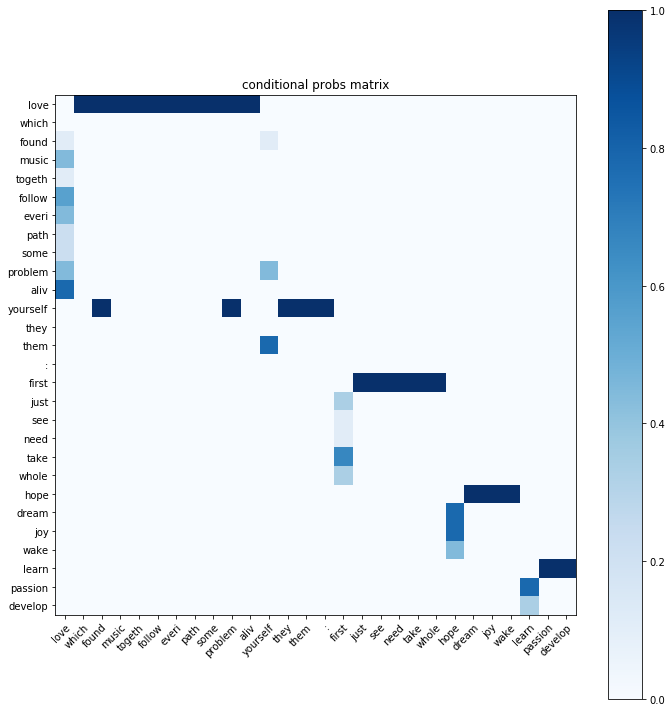

In [169]:
plot_cond_probs_matrix(np.array(matrix), wordds)

# The 25 First Pairs Of Words 

In [50]:
words, probs_matrix = pick_pairs_words(P, 25)

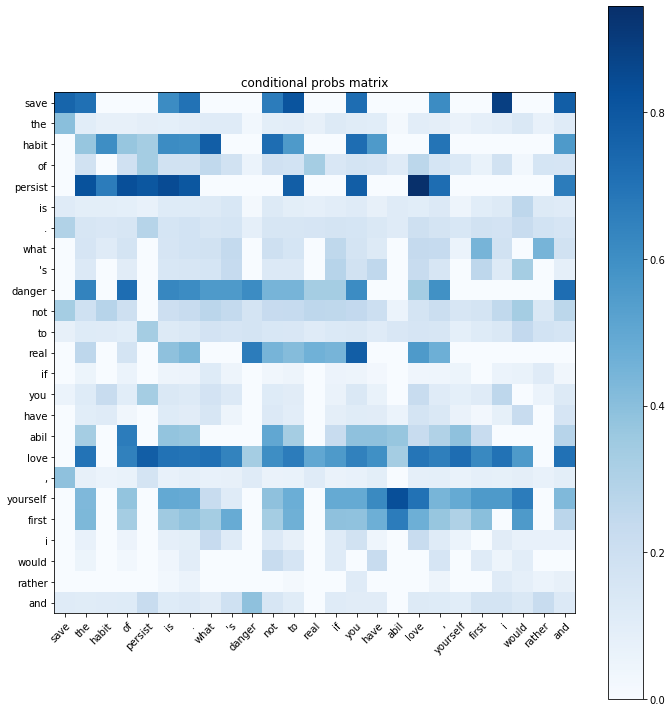

In [51]:
plot_cond_probs_matrix(np.array(probs_matrix), words)